# 지도학습 - 회귀
- 회귀란?
    : 학습 데이터에 부합되는 출력값이 실수인 함수를 찾는 문제

- 성능
    - 오차 : 예측값과 실제값의 차이

- 과적합 & 부적합
    - 과적합 : 지나치게 복잡한 모델 사용
    - 부적합 : 지나치게 단순한 모델 사용
  
      -> 과적합 대응 방법 : 모델의 복잡도를 성능 평가에 반영
      
      -> 목적함수 = 오차의 합 + (가중치)*(모델 복잡도)

# 회귀(Regression) 
: 예측 모델링 기법 중 하나로 독립 변수와 종속 변수 간의 관계를 모델링하여 연속적인 값을 예측하는 것을 목표로 한다.

1. 선형회귀 : 가장 기본적인 회귀 방법, 선형관계를 모델링(가장 기본적인 회귀 방법)
2. 다중회귀 : 두 개 이상의 독립변수 사용
3. 다항회귀 : 독립변수와 종속변수 간의 비선형관계를 모델링
4. 릿지회귀 : 과적합을 방지해주는 회귀(L2 정규화)
5. 라쏘회귀 : L1 정규화
6. 로지스틱회귀 : 종속변수가 범주형인 경우(분류 문제에 쓰인다.) ⭐️⭐️⭐️
7. 엘라스틱 넷 회귀 : L1, L2 정규화

# 1) 선형회귀(Linear Regression)

In [1]:
from sklearn.datasets import fetch_openml # 데이터 불러오는 라이브러리

import numpy as np
import pandas as pd # numpy와 pandas 사용을 위한 라이브러리

import scipy as sp
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols # 머신러닝을 위한 라이브러리

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # 평가를 위한 라이브러리

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')

In [2]:
# 데이터 로드
boston = fetch_openml(name='boston', version=1, as_frame=True)
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [3]:
boston.data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [4]:
boston.target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [5]:
boston.feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [6]:
boston.data.shape

(506, 13)

In [7]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])

In [8]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [9]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28


In [12]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27


- statsmodels의 OLS를 사용하여 선형회귀분석 실행(Ordinary Least Squares)

- OLS란, 가장 기본적인 선형회귀 방법 잔차제곱합(RSS : Residual Sum of Squares)를 최소화하는 가중치를 구하는 방법

# 잔차
: 데이터 포인트에 대해 실제값과 예측값의 차이를 계산한 값

# 잔차제곱합(RSS)
: 잔차를 제곱한 값들의 모음(합)(작을수록 좋다. = 모델의 예측이 실제 데이터와 가깝다는 것을 의미)

In [13]:
X_train = X_train.astype(float) # 선형회귀모델이 실수 연산을 하기 때문에 데이터 전처리를 float으로 처리한다.
X_train = sm.add_constant(X_train) # 데이터셋에 상수항을 추가한다.(모든 값을 1로 할당)
model = sm.OLS(y_train, X_train, axis=1) # 모델 선언
model_trained = model.fit() # 모델 학습

In [14]:
model_trained

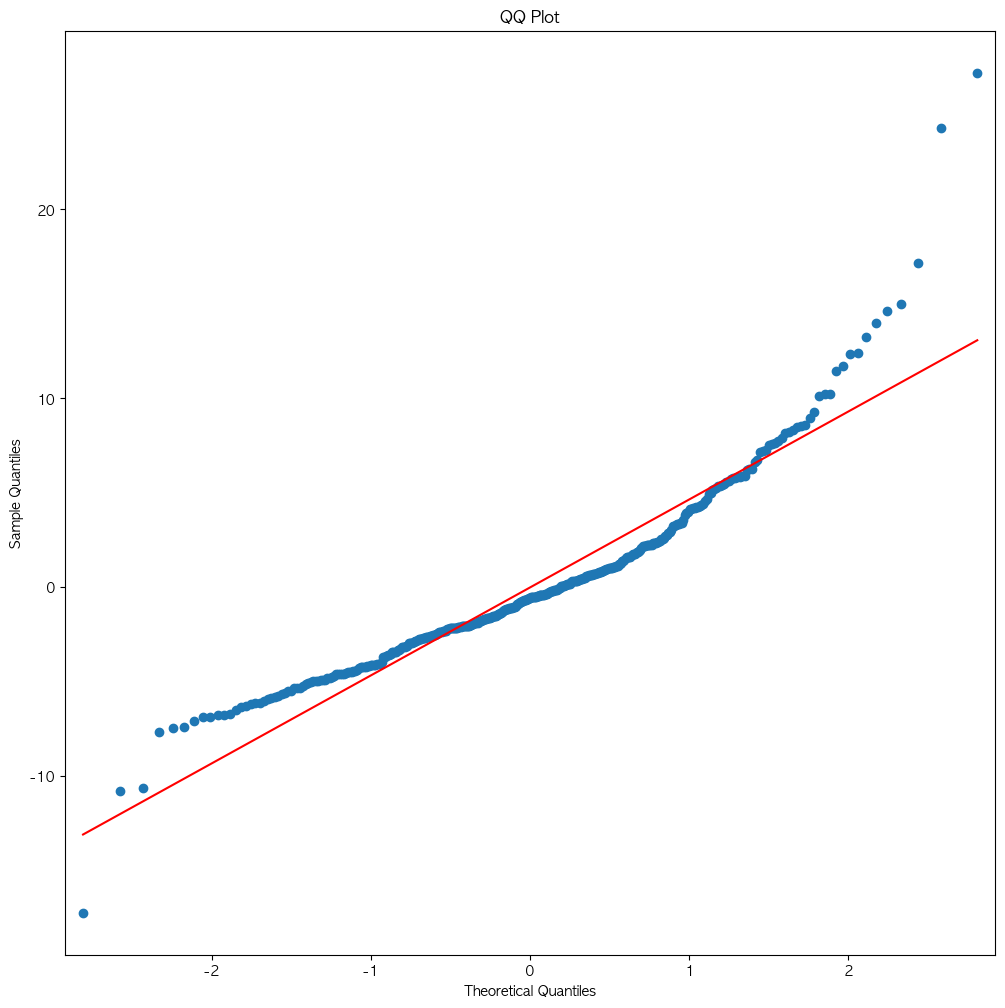

In [15]:
# 데이터를 가지고 진짜 선형관계를 나타내주는 코드를 작성하고자 한다.
# QQ 플롯 : 두 개의 분포의 분위수를 비교하는 그래프
# 잔차가 정규분포를 따르는지 확인할 수 있다.(점들이 대각선에 가깝게 배열)(= 정규분포를 따른다.)

model_residuals = model_trained.resid # 잔차 부분을 가져온다.

fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='red', ax=ax) # line = 's' 정규분포를 기준으로 하는 직선
ax.title.set_text('QQ Plot')

In [16]:
model_residuals # 잔차, 어떤값이 들어있는지

477    1.030476
15     0.488034
332   -3.664196
423    1.252935
19    -0.173812
         ...   
106    2.259281
270   -0.904800
348   -2.223742
435    0.423258
102   -0.542796
Length: 404, dtype: float64

[Text(0.5, 0, 'Fitted Values'), Text(0, 0.5, 'Residuals')]

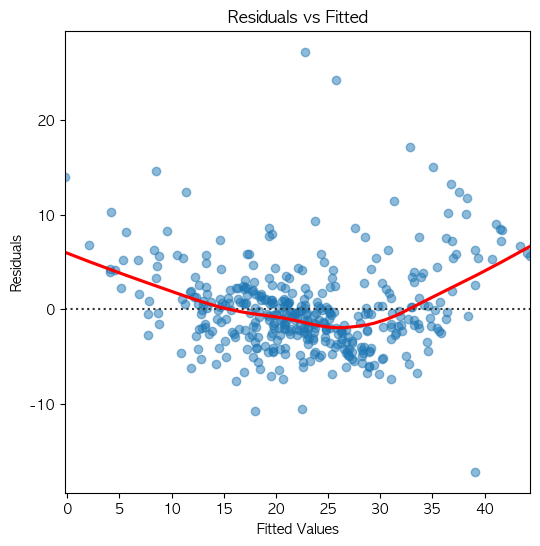

In [17]:
# 잔차의 적합성(예측값과 잔차의 관계 시각화)
# 잔차의 적합성
model_fitted_y = model_trained.fittedvalues

fig, ax = plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(6)

# seaborn의 residplot 사용, Lowess=True(로컬 가중치 회귀(LOWESS)로 사용하여 추세선을 그리겠다.)
sns.residplot(x=model_fitted_y, y=y_train, data=X_train, lowess=True, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted Values', ylabel='Residuals')

# 통계적으로 수치데이터를 보고 해석하는 방식
1. R-dquared(결정계수)(coefficient of determination) : 모형의 성능
   
    => 종속변수의 변동성 중에서 회귀 모델이 설명할 수 있는 부분의 비율
   
2. coef(회귀계수) : X가 한 단위 증가할 때 Y의 변화량

    => 양수 : 종속변수 증가
   
    => 음수 : 종속변수 감수
   
    => 회귀계수의 절댓값이 크면 독립변수가 종속변수에 큰 영향을 미친다.


3. p-value(P > |t|) : 0.05 이하일 때, 변수(회귀계수)가 유의미한지 판단 가능

    => 독립변수가 종속변수에 영향을 미치는지를 판단하는 값

    => ex) 0.05의 값은 5% 확률로 잘못된 결론을 내릴 수 있다.

* 귀무가설 : 독립변수가 종속변수에 영향을 미치지 않는다.

In [18]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.43
Date:                Mon, 10 Jun 2024   Prob (F-statistic):          6.21e-109
Time:                        09:13:18   Log-Likelihood:                -1194.3
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.2468      5.677      5.328      0.0

In [19]:
# 위 결과를 통해 p-value가 높은 변수를 제거하고자 한다.(INDUS, AGE)
model = sm.OLS(y_train, X_train.drop(['INDUS', 'AGE'], axis=1))
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     107.2
Date:                Mon, 10 Jun 2024   Prob (F-statistic):          7.52e-111
Time:                        09:13:18   Log-Likelihood:                -1194.6
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     392   BIC:                             2461.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.3288      5.654      5.364      0.0

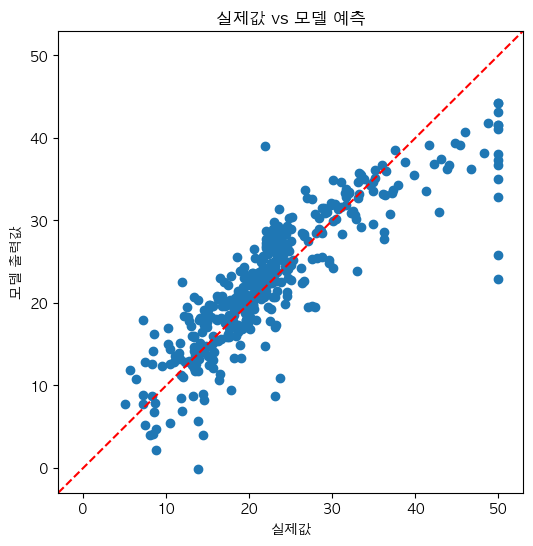

In [20]:
# 시각화(그래프 그리기)(실제값과 모델의 출력값을 확인해보자.)
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(6, 6))
plt.title('실제값 vs 모델 예측')
plt.scatter(y_train, y_train_pred)
plt.plot([-3, 53], [-3, 53], ls='--', c='red')
plt.xlabel('실제값')
plt.ylabel('모델 출력값')
plt.xlim(-3, 53)
plt.ylim(-3, 53)
plt.show()

In [21]:
print("모델이 학습될 때 사용된 특성 수 :", len(model_trained.params))
print("테스트에 사용되는 특성 수 :", X_test.shape[1])

모델이 학습될 때 사용된 특성 수 : 12
테스트에 사용되는 특성 수 : 13


In [22]:
model_trained.params

const      30.328798
CRIM       -0.113903
ZN          0.029592
CHAS        2.831118
NOX       -16.947998
RM          4.362608
DIS        -1.440791
RAD         0.253876
TAX        -0.009663
PTRATIO    -0.912985
B           0.012203
LSTAT      -0.513481
dtype: float64

In [23]:
X_test.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [24]:
X_test = sm.add_constant(X_test)

In [25]:
X_test = X_test.astype(float)
y_test_pred = model_trained.predict(X_test.drop(['INDUS', 'AGE'], axis=1))
y_test_pred.head()

173    29.290302
274    35.892006
491    14.680930
72     24.634702
452    18.770526
dtype: float64

# Mean Squared Error (평균 제곱 오차 MSE) <br>
$\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}$  

: MSE는 예측 값과 실제 값 사이의 차이 제곱의 평균 값

1. 공식 해석
- 오차의 제곱 : 오차가 양수와 음수로 상쇄되지 않도록 큰 오차에 더 큰 패널티를 부여한다.
- 평균 : 예측의 일관성 (개별 오차가 전체 MSE에 영향을 미치지 않도록)

2. MSE 값 해석
- 값의 범위 : 0에서부터 시작한다. 값이 작을수록 실제 값과 예측이 가깝다. 완벽한 모델의 경우 MSE는 0이 된다.
- 비교 : 여러 모델 성능을 비교할 때, 더 작은 MSE 값의 모델을 선택한다.

3. 단점
이상치에 민감하다. 해석이 어려움. 비교대상이 없다.

In [26]:
print(mean_squared_error(y_test, y_test_pred))

24.088447893940675


# Root Mean Squared Error (제곱근 평균 제곱 오차 RMSE) <br>
$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}}$

- MSE 단점을 보완하기 위한 평가지표다.
- 오차의 단위를 줄이고, 평균적인 오차의 크기를 파악할 수 있어 해석하기 쉽다.

In [27]:
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

4.907998359203136


# Mean Absolute Error (평균 절대 오차 MAE) <br>
$\frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y}_{i}|$

: 예측값과 실제값 사이의 절대 오차의 평균

1. 장점
- 예측과 실제 값이 얼마나 가까운지 직관적으로 알 수 있다.
- MAE 단위는 종속 변수 단위와 동일하다.
- 이상치에 덜 민감하다.

2. 단점
- 오차의 방향을 무시한다. 절대값을 사용하므로 예측이 실제값보다 큰지 작은지 구분할 수 없다.
- MAE는 미분이 불가능하여 일부 최적화 알고리즘에서 사용할 수 없다.

In [28]:
print(mean_absolute_error(y_test, y_test_pred))

3.14969428552968


# Mean Absolute Percentage Error (평균 절대 백분율 오차 MAPE) <br>
$\frac{1}{n}\sum_{i=1}^{n} \left|\frac{y_{i} - \hat{y}_{i}}{y_{i}} \right| \times 100\%$

: 예측값과 실제값 사이의 절대값을 실제값으로 나누어 백분율로 나타낸 후 평균을 구한다.

1. 장점
- 백분율로 값이 표시되므로 예측의 정확도를 직관적으로 알 수 있다.
- MAPE 값은 예측이 실제 값의 몇 퍼센트만큼의 오차가 있는지 알 수 있다.
- 다양한 데이터 셋, 모델들과의 비교가 용이하다.

2. 단점
- 0 값의 처리: 실제 값이 0에 가까운 경우, MAPE는 매우 큰 값을 가지거나 정의되지 않을 수 있다. 데이터 전처리가 필요하다.
- 예측값의 크기 차이 : 굉장히 큰 값과 작은 값이 존재를 한다.

In [29]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

print(mean_absolute_percentage_error(y_test, pd.DataFrame(y_test_pred)))

16.643428981117246


# 결정계수 (${R}^{2}$)
SSR/SST = 1 - SSE/SST

1. 기준
- 값이 1에 가까울수록 모델이 데이터 예측을 잘한다. (모델의 예측값과 실제값의 차이가 작다.) ⭐️⭐️⭐️
- 값이 0이면 모델이 데이터를 전혀 예측하지 못한다.
- 값이 음수이면 모델의 예측값이 실제 값보다 더 나쁘다.

2. 숫자값
- 0.8 이상이면 매우 잘 설명하고 있다.
- 0.5 ~ 0.8 적당히 예측하고 있는 모델이다.
- 0.3 ~ 0.5 예측을 하고 있는 모델이다.

In [30]:
print(r2_score(y_test, y_test_pred))

0.6715231799608878


- Sklearn : 데이터 분석 도구
- StatModels : 통계 분석 도구(회귀 모델) R, Stata과 같은 통계 소프트웨어와 같은 통계량 도구를 제공한다.

In [32]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [34]:
lr_skl = LinearRegression(fit_intercept=False) # default가 False
lr_skl.fit(X_train, y_train)
y_pred_skl = lr_skl.predict(X_test)

lr_stat = sm.OLS(y_train, X_train).fit()
y_pred_stat = lr_stat.predict(X_test)

In [36]:
test_mse_stat = mean_squared_error(y_test, y_pred_stat)
test_rmse_stat = np.sqrt(mean_squared_error(y_test, y_pred_stat))
test_mae_stat = mean_absolute_error(y_test, y_pred_stat)
test_mape_stat = mean_absolute_percentage_error(y_test, pd.DataFrame(y_pred_stat))
test_r2_stat = r2_score(y_test, y_pred_stat)

print('MSE: {:.3f}'.format(test_mse_stat))
print('RMSE: {:.3f}'.format(test_rmse_stat))
print('MAE: {:.3f}'.format(test_mae_stat))
print('MAPE: {:.3f}'.format(test_mape_stat))
print('R2: {:.3f}'.format(test_r2_stat))

MSE: 24.291
RMSE: 4.929
MAE: 3.189
MAPE: 16.866
R2: 0.669


In [37]:
test_mse_skl = mean_squared_error(y_test, y_pred_skl)
test_rmse_skl = np.sqrt(mean_squared_error(y_test, y_pred_skl))
test_mae_skl = mean_absolute_error(y_test, y_pred_skl)
test_mape_skl = mean_absolute_percentage_error(y_test, pd.DataFrame(y_pred_skl))
test_r2_skl = r2_score(y_test, y_pred_skl)

print('MSE: {:.3f}'.format(test_mse_skl))
print('RMSE: {:.3f}'.format(test_rmse_skl))
print('MAE: {:.3f}'.format(test_mae_skl))
print('MAPE: {:.3f}'.format(test_mape_skl))
print('R2: {:.3f}'.format(test_r2_skl))

MSE: 24.291
RMSE: 4.929
MAE: 3.189
MAPE: 16.866
R2: 0.669


In [38]:
np.array(y_pred_stat).shape

(102,)

In [40]:
np.array(y_pred_skl).shape

(102, 1)